# [**Pénalité $\ell_1$ et parcimonie en régression logistique**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/1_1_linear_model/plot_logistic_l1_l2_sparsity.ipynb)<br/>([$\ell_1$ _Penalty and Sparsity in Logistic Regression_](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_l1_l2_sparsity.html))

Comparaison de la parcimonie (pourcentage de coefficients nuls) des solutions lorsque les pénalités $\ell_1$, $\ell_2$ et Elastic-Net sont utilisées pour différentes valeurs de `C`. On peut voir que de grandes valeurs de `C` donnent plus de liberté au modèle. Inversement, de plus petites valeurs de `C` contraignent davantage le modèle. Dans le cas de la pénalité $\ell_1$, cela conduit à des solutions plus parcimonieuses. Comme prévu, la parcimonie de la pénalité Elastic-Net se situe entre celle de $\ell_1$ et de $\ell_2$.

Nous classons des images de 8x8 pixels de chiffres en deux classes : 0-4 contre 5-9. La visualisation montre les coefficients des modèles pour différentes valeurs de `C`.

C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                26.56%
Sparsity with Elastic-Net penalty:       9.38%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


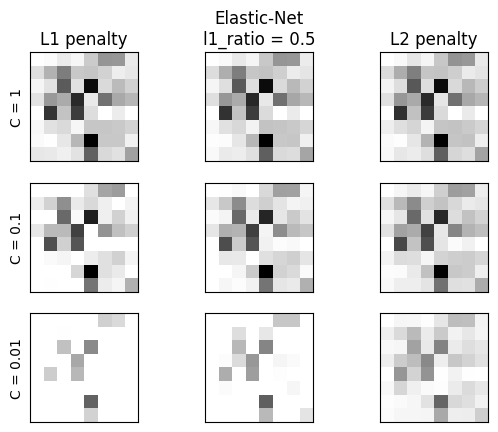

In [1]:
# Authors: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Andreas Mueller <amueller@ais.uni-bonn.de>
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = datasets.load_digits(return_X_y=True)

X = StandardScaler().fit_transform(X)

# classify small against large digits
y = (y > 4).astype(int)

l1_ratio = 0.5  # L1 weight in the Elastic-Net regularization

fig, axes = plt.subplots(3, 3)

# Set regularization parameter
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(C=C, penalty="l1", tol=0.01, solver="saga")
    clf_l2_LR = LogisticRegression(C=C, penalty="l2", tol=0.01, solver="saga")
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", solver="saga", l1_ratio=l1_ratio, tol=0.01
    )
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)

    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with Elastic-Net penalty:", sparsity_en_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X, y)))
    print(
        "{:<40} {:.2f}".format("Score with Elastic-Net penalty:", clf_en_LR.score(X, y))
    )
    print("{:<40} {:.2f}".format("Score with L2 penalty:", clf_l2_LR.score(X, y)))

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel(f"C = {C}")

plt.show()